In [ ]:
import os
import sys

# Get the path to the `src` directory
src_path = os.path.relpath('..')
sys.path.append(src_path)

from typing import List
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')

from src.types import *
from src.clustering.random import RandomClustering
from src.clustering.louvain import LouvainClustering
from src.clustering.greedy import GreedyClustering

import warnings
warnings.filterwarnings("ignore", category=RuntimeWarning)

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


---
### 1 - Select Periods - Build Graph

In [116]:
# Path
data_path = os.path.relpath('../data/CAC40/FR_2009')

# Load data from a JSONL file
market = Market.loader('2009/09/01','2009/10/01', data_path)

100%|██████████| 48/48 [13:19<00:00, 16.65s/it]


In [117]:
# Get periods of length 15
periods = market.get_periods(period_length=3600)
print(f"Number of periods: {len(periods)}")

Number of periods: 264


/Users/marc-antoineallard/Desktop/FinBigData/FinBigDataClustering/examples/../src/types.py:121: RuntimeWarning: Mean of empty slice
  mean_quote_volume_imbalance = np.nanmean(stock_data[:, 3])  # Mean of quote volume imbalance, ignoring NaNs
/Users/marc-antoineallard/Desktop/FinBigData/FinBigDataClustering/examples/../src/types.py:385: RuntimeWarning: divide by zero encountered in divide
  
/Users/marc-antoineallard/Desktop/FinBigData/FinBigDataClustering/examples/../src/types.py:385: RuntimeWarning: invalid value encountered in divide
  
/Users/marc-antoineallard/Desktop/FinBigData/FinBigDataClustering/examples/../src/types.py:123: RuntimeWarning: Mean of empty slice
  # Combine into a new array
/Users/marc-antoineallard/Desktop/FinBigData/FinBigDataClustering/examples/../src/types.py:124: RuntimeWarning: Mean of empty slice
  fv_vals_stock = np.array([mean_trade_price, sum_trade_volume, mean_spread, mean_quote_volume_imbalance])
/Users/marc-antoineallard/opt/miniconda3/envs/MLDS/lib/

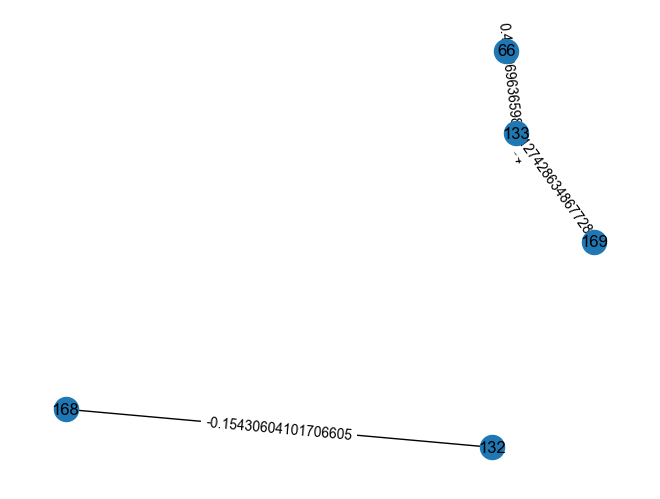

In [121]:
# Build the graph
state_graph = market.build_graph(periods, threshold=0.10, inter=True)

---
### 2 - Clustering

### 2.1 - Louvain Clustering

In [119]:
# Clustering process
clustering = LouvainClustering().fit(periods, G=state_graph)

# Get the clusters
clusters = clustering.clusters

print(f"Number of periods: {len(periods)}")
print(f"Number of clusters: {len(clusters)}")
print(f"Cluster sizes: {[len(cluster) for cluster in clusters]}")
#print(f"Cluster centers: {clustering.cluster_centers}")
print(f"Transition matrix: \n{clustering.transition_matrix}")

Number of periods: 264
Number of clusters: 2
Cluster sizes: [2, 0]
Transition matrix: 
[[0.         1.        ]
 [0.00766284 0.99233716]]


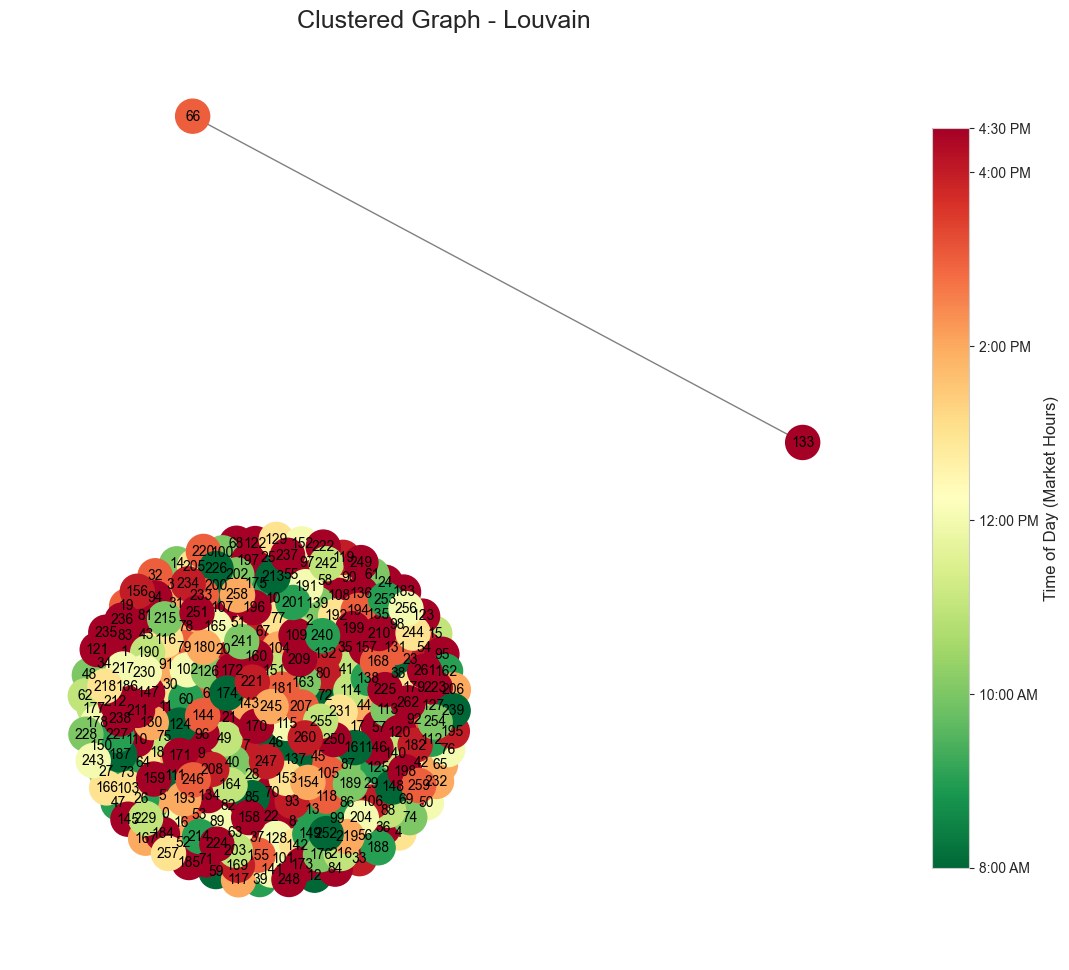

In [120]:
clustering.plot_cluster(method='Louvain')

### 2.2 - Greedy Clustering

In [112]:
clustering = GreedyClustering().fit(periods, G=state_graph)

# Get the clusters
clusters = clustering.clusters

print(f"Number of periods: {len(periods)}")
print(f"Number of clusters: {len(clusters)}")
print(f"Cluster sizes: {[len(cluster) for cluster in clusters]}")
#print(f"Cluster centers: {clustering.cluster_centers}")
print(f"Transition matrix: \n{clustering.transition_matrix}")

Number of periods: 175
Number of clusters: 6
Cluster sizes: [74, 54, 27, 14, 4, 1]
Transition matrix: 
[[0.36486486 0.2972973  0.2027027  0.08108108 0.04054054 0.01351351]
 [0.44444444 0.27777778 0.16666667 0.09259259 0.01851852 0.        ]
 [0.55555556 0.37037037 0.07407407 0.         0.         0.        ]
 [0.5        0.35714286 0.         0.14285714 0.         0.        ]
 [0.25       0.25       0.25       0.25       0.         0.        ]
 [1.         0.         0.         0.         0.         0.        ]]


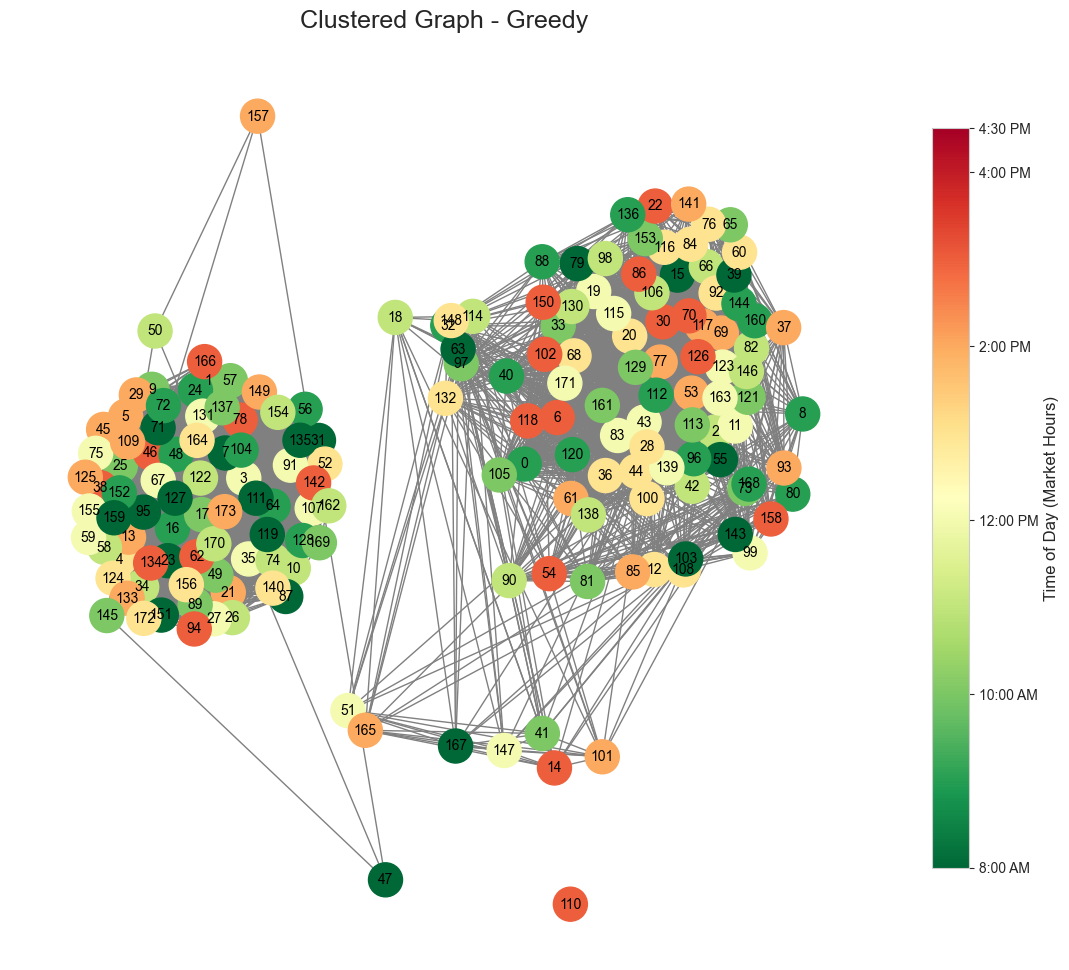

In [114]:
clustering.plot_cluster(method='Greedy')